<h3>Загрузка бібліотек та виведення датасету</h3>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

df=pd.read_csv('AmazonProduct.csv')
print("Shape of data=>",df.shape)

Shape of data=> (34660, 21)


C:\Users\amigo\AppData\Local\Temp\ipykernel_8296\4003869057.py:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('AmazonProduct.csv')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

<h2>Препроцесінг даних</h2>

<h3>Відбір ознак для того, щоб аналізувати текст</h3>

In [11]:
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 27900 non-null  object 
 1   reviews.text         34659 non-null  object 
 2   reviews.doRecommend  34066 non-null  object 
 3   reviews.numHelpful   34131 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


<h3>Видалення null-values</h3>

In [12]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

<h3>Вибірка даних лише з мінімуму 500 відгуків користувачів, щоб мати з чим працювати надалі</h3>

In [14]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>', len(df['name'].unique()))

Number of products=> 8


<h3>Конвертація ознак reviews.doRecommend та reviews.numHelpful в integer</h3>

In [15]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 26068 non-null  object
 1   reviews.text         26068 non-null  object
 2   reviews.doRecommend  26068 non-null  int32 
 3   reviews.numHelpful   26068 non-null  int32 
dtypes: int32(2), object(2)
memory usage: 611.1+ KB


<h2>Text Cleaning</h2>

<h3>Подивимось на текст ознаки name</h3>

In [16]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

<h4>Назви деяких продуктів містять повторювані назви, розділені трьома послідовними комами (,,,)<p>

In [18]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

<h3>Подивимось на ознаку reviews.text</h3>

In [20]:
for index,text in enumerate(df['reviews.text'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


<h4>Тут ви бачите, що ми маємо деякі скорочення, як-от «It's», цифри, як-от «3», і знаки пунктуації, як-от «,», «!» і "." присутні в оглядах.</h4>

<h3>Розширення скорочень</h3>

In [23]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [24]:
for index,text in enumerate(df['reviews.text'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


<h3>Lowercase тексту, тому що модель аналізу тексту відчутна до реєстру</h3>

In [25]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

<h3>Видалення цифр та знаків пунктуації</h3>

In [28]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Видалення зайвих пробілів
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

<h3>Перевірка результату</h3>

In [29]:
for index,text in enumerate(df['cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures excellent camera
Review 4:
 i bought tablets and my family was not disappointed
Review 5:
 great tablet fast screen good size never gives me problem


<h2>Підготовка текстових даних до EDA</h2>

<h3>Вилучення стоп-слів (типу I, this, in, які не несуть особливого значення) та лематизація</h3>

In [34]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

<h3>Групування за продуктами</h3>

In [35]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
name                                                                                                 
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  product far disappoint child love use like abi...
Amazon Fire Tv                                      echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  good value money hand work perfectly purchase ...
Echo (White)                                        compete ipad high end android tablet easily ou...

<h3>Створення DTM (Document Term Matrix) для виявлення частоти слів</h3>

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index = df_grouped.index
df_dtm.head(3)

aa  aaa  aamazon  abandon  \
name                                                                            
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...   0    0        0        0   
Amazon Fire Tv                                       0    1        1        0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...   0    0        0        1   

                                                    abattery  abc  abcmouse  \
name                                                                          
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...         0    0         0   
Amazon Fire Tv                                             0    0         0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...         0    2         0   

                                                    abcmousecom  abcs  abd  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...            0     0    0   
Amazon Fire Tv                                                0     0    0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...            0     0    0   

                                                    ...  zero  zigbee  zinio  \
name                                                ...                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  ...     4       0      1   
Amazon Fire Tv                                      ...     0       0      0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  ...     4       0      0   

                                                    zip  zippy  zone  zoo  \
name                                                                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...    0      0     0    0   
Amazon Fire Tv                                        1      0     0    0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...    0      0     2    0   

                                                    zoom  zooming  zwave  
name                                                                      
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...     0        0      0  
Amazon Fire Tv                                         0        0      0  
Amazon Kindle Paperwhite - eBook reader - 4 GB ...     2        0      0  

[3 rows x 11605 columns]

<h2>EDA</h2>

<h3>Візуалізація найбільш вживані
    слова у відгуках до кожного продукта</h3>

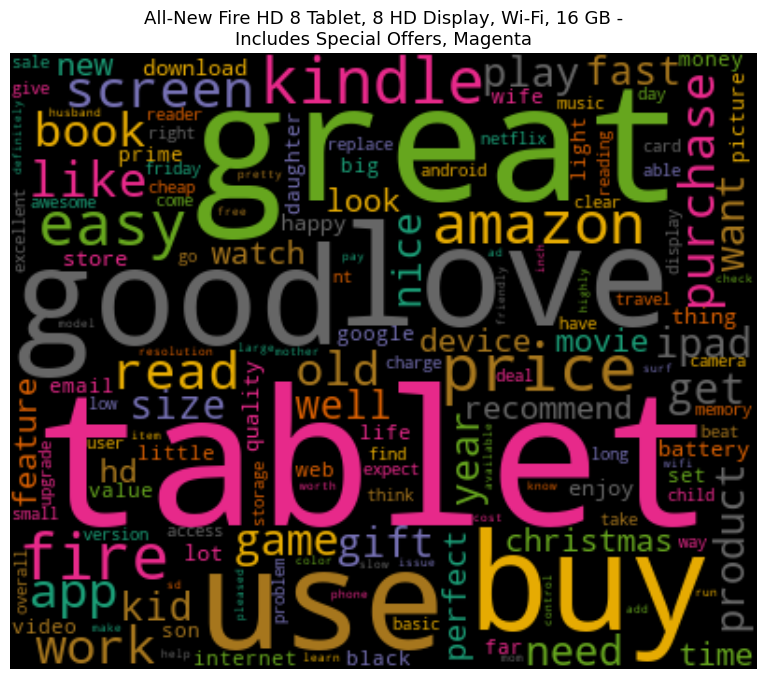

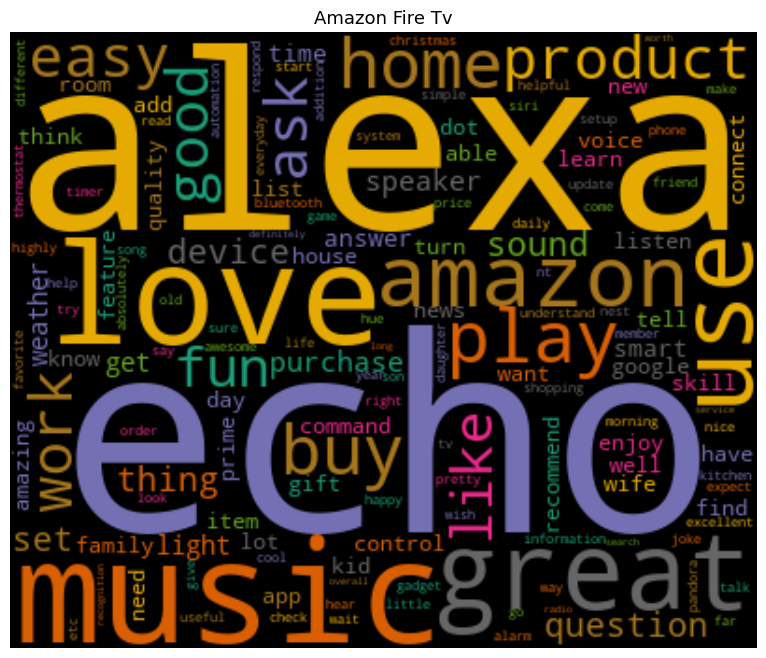

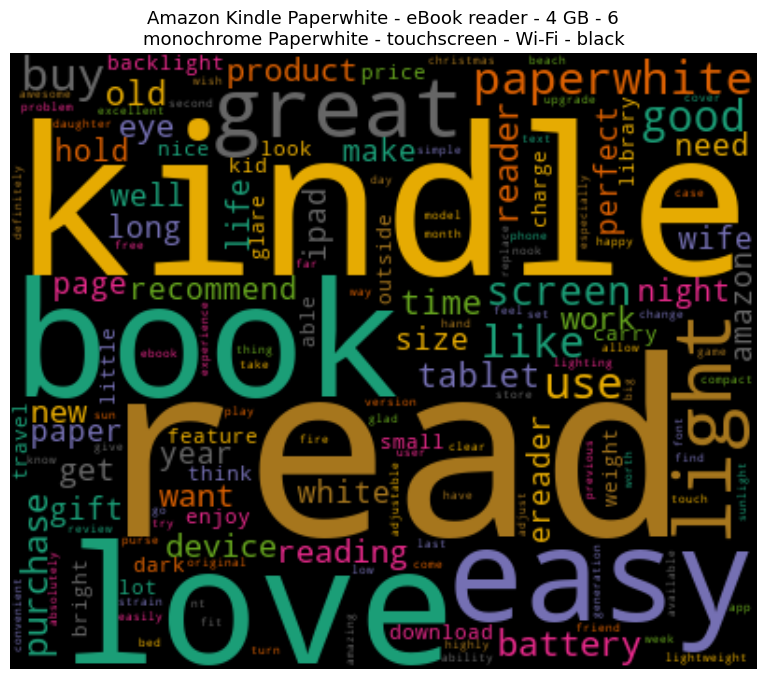

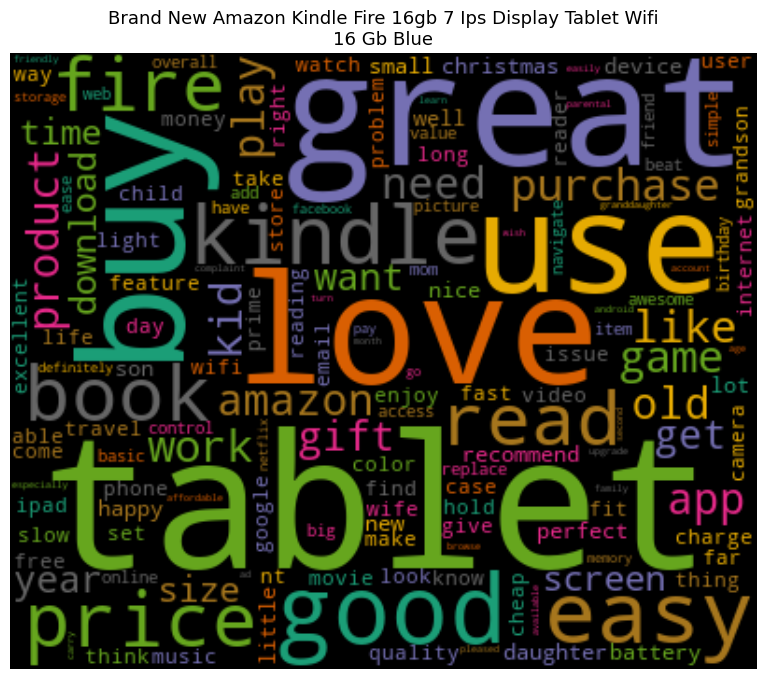

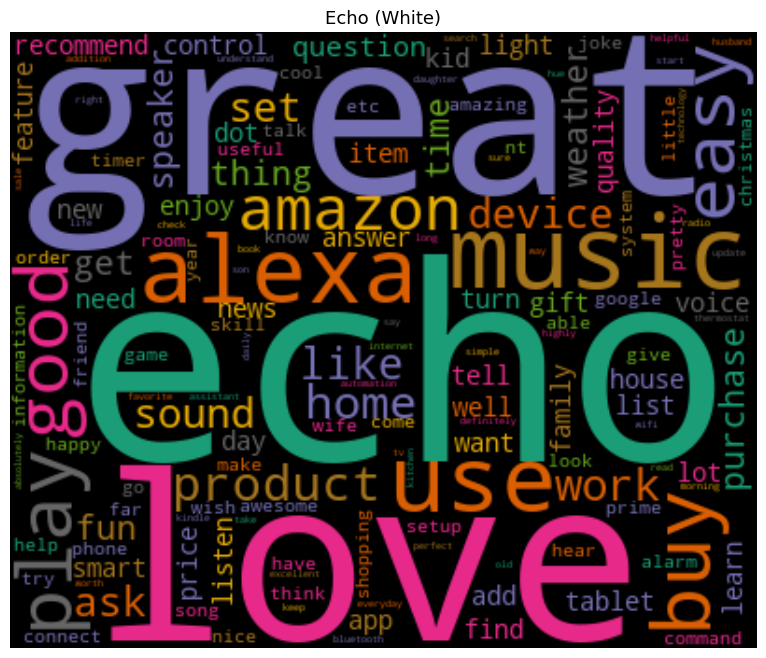

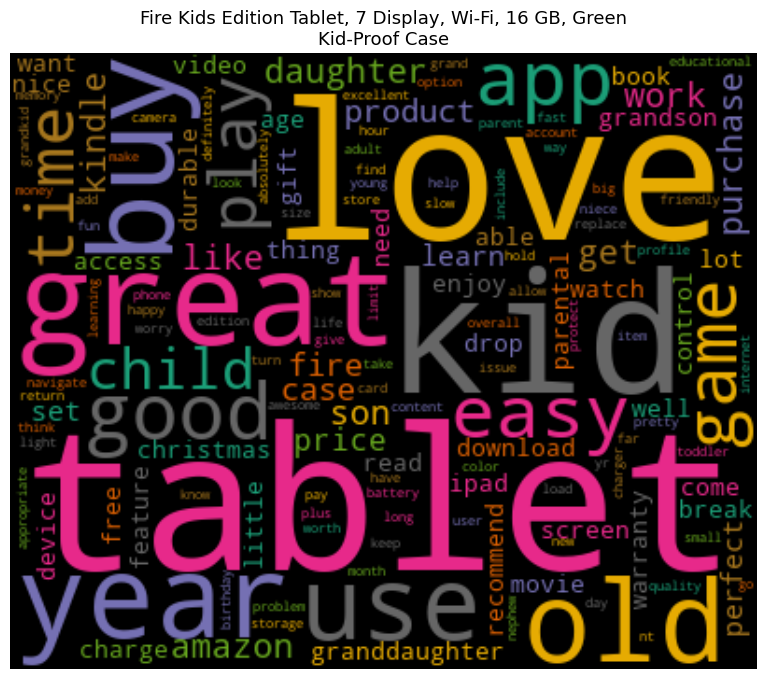

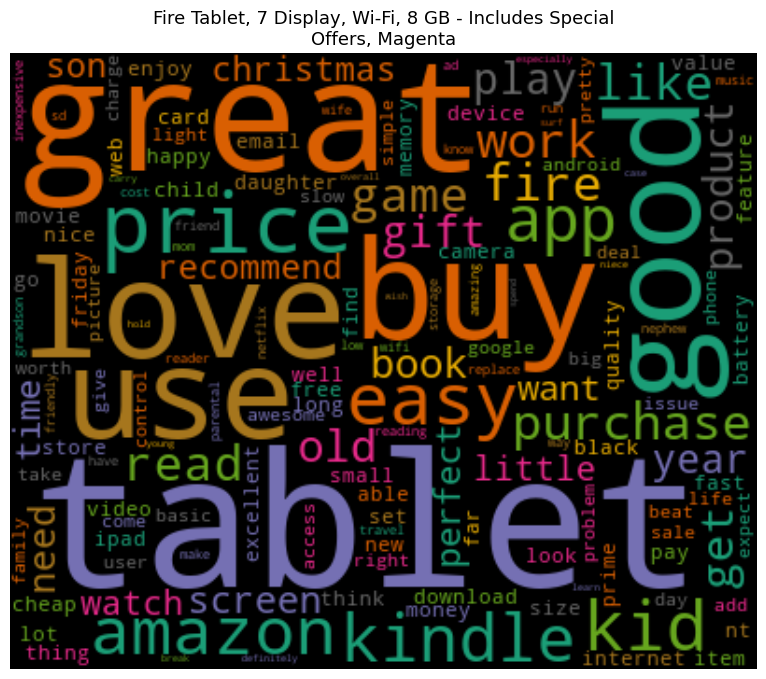

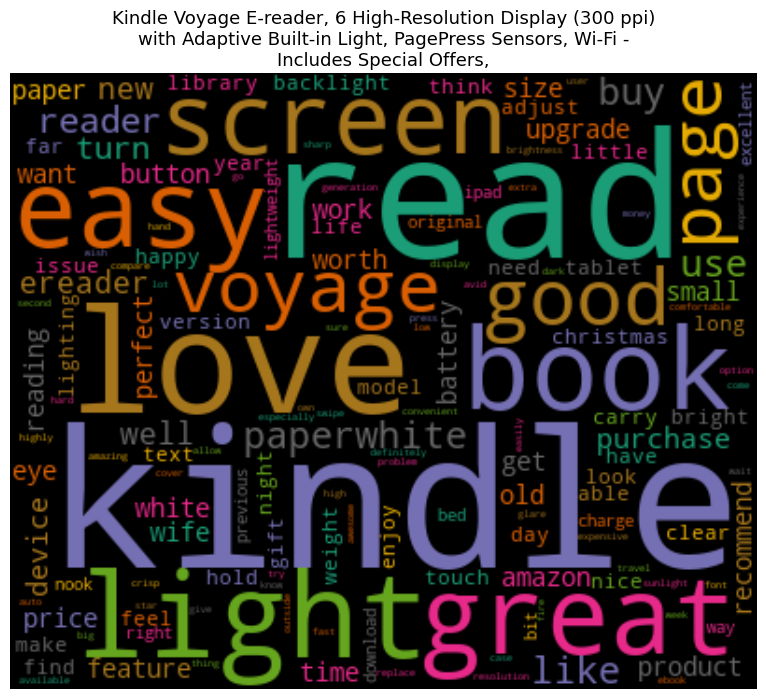

In [44]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  

df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

<p>Тут ми бачимо, що слова ЛЮБИТИ, КОРИСТУВАТИСЯ, КУПУВАТИ, ЧУДОВО та ЛЕГКО – це слова, які найчастіше зустрічаються для майже кожного продукту. Це означає, що користувачі люблять продукти від Amazon і вважають їх покупку чудовим рішенням. Вони також знайшли їх простими у використанні.</p>

<h3>Візуалізація найменш вживані
    слова у відгуках до кожного продукта</h3>

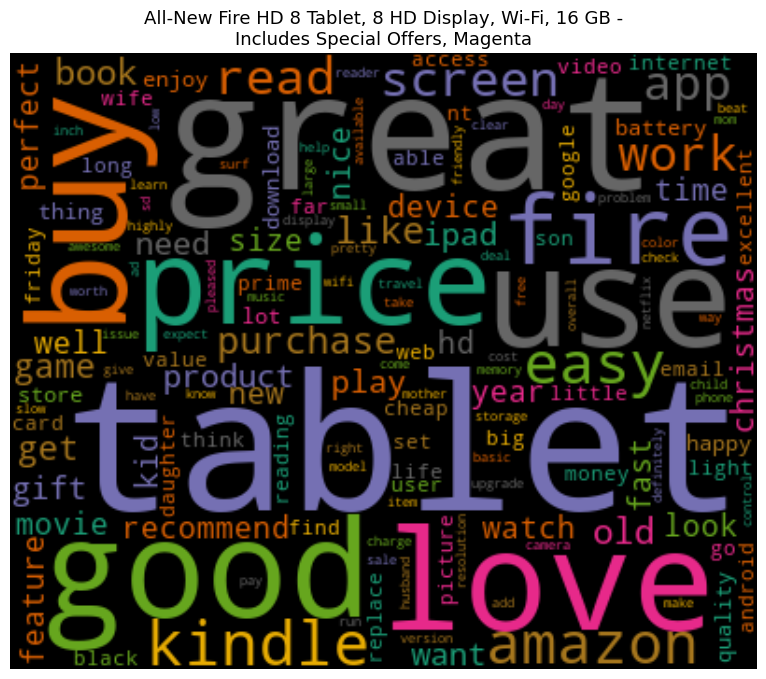

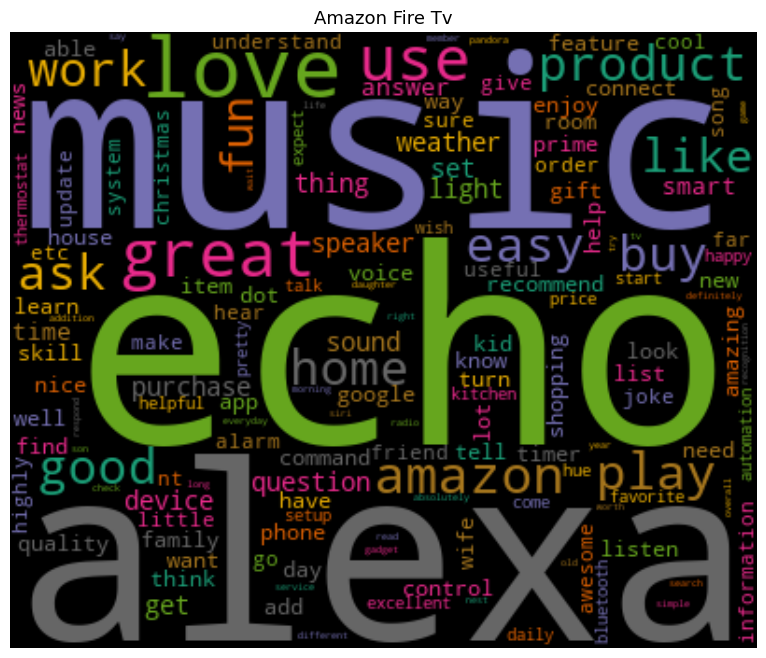

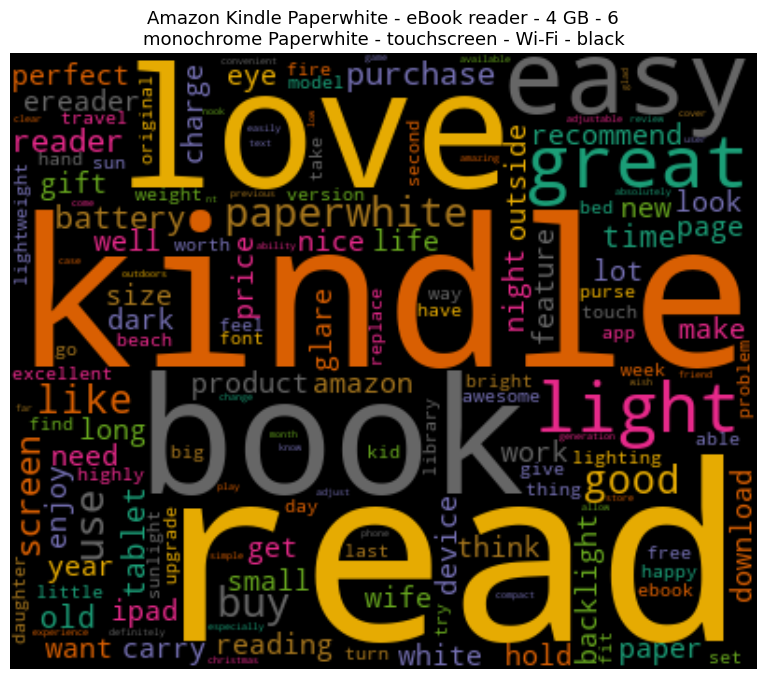

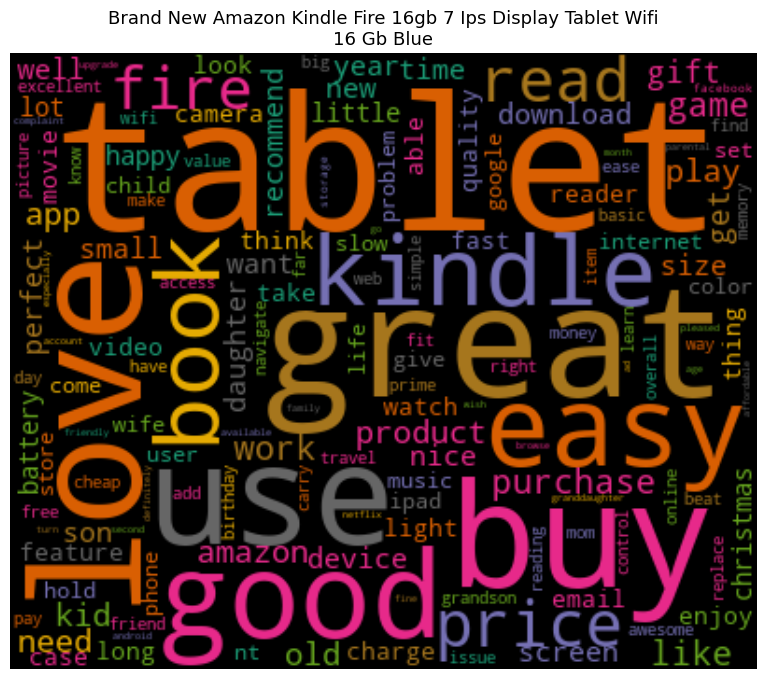

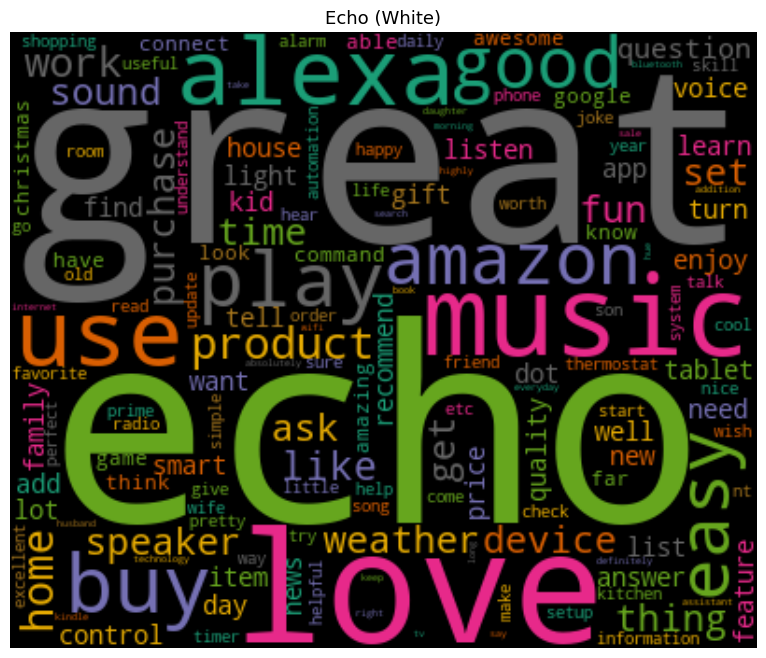

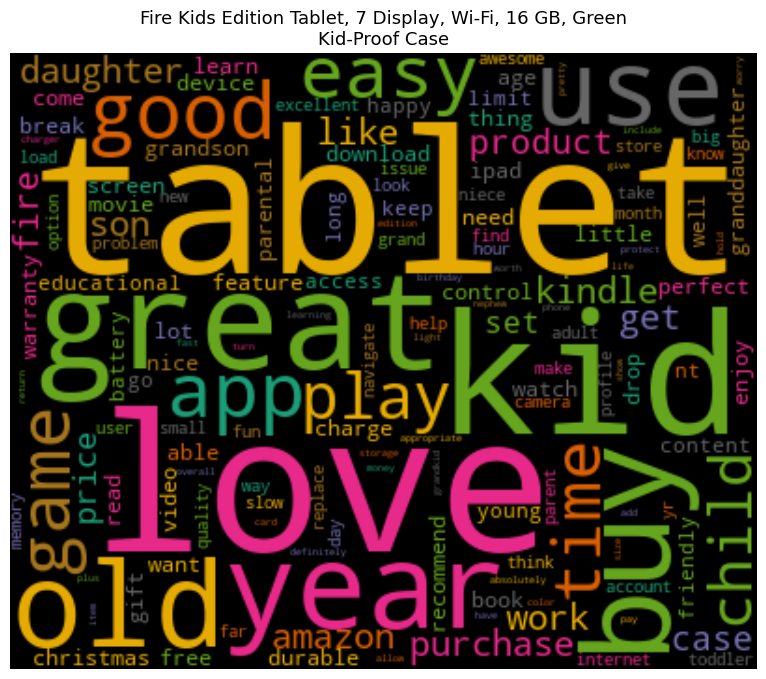

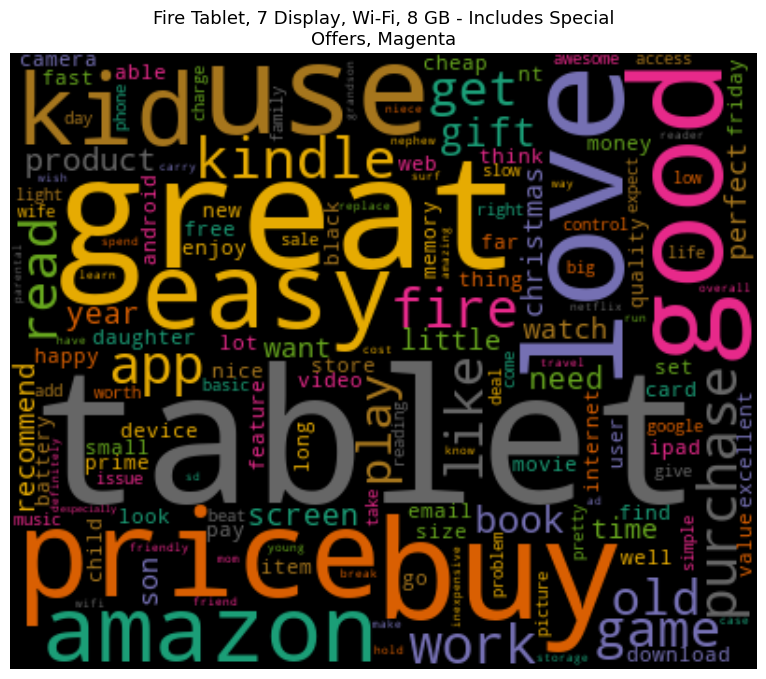

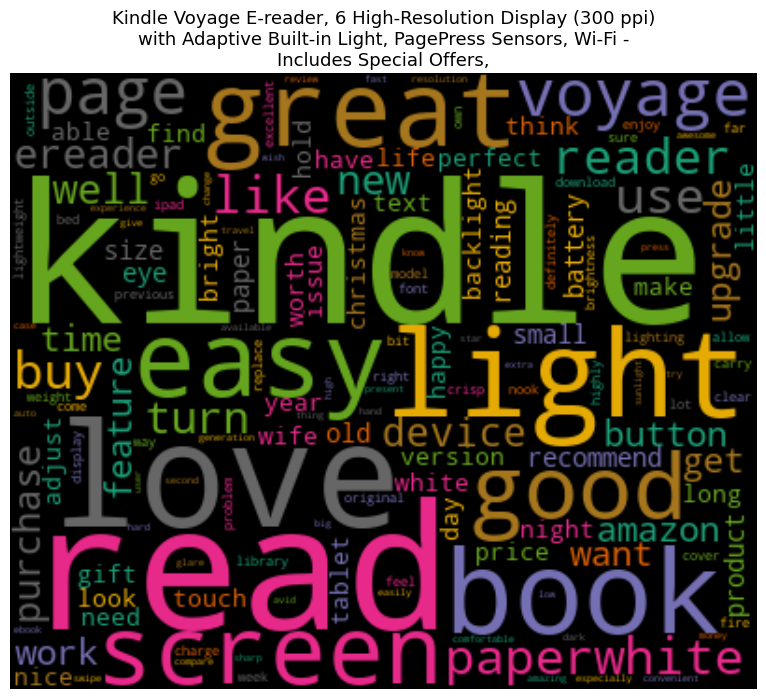

In [45]:
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=True),product)

<p>Навіть, якщо дивитись на найменш вживані слова, то можна побачити в деяких продуктах позитивні відгуки</p>

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Використовуйте TfidfVectorizer для обчислення TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_grouped['lemmatized'])

# Створіть DataFrame з зваженою матрицею термінів
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf.index = df_grouped.index

# Перегляньте результат
df_tfidf.head()

aa       aaa   aamazon  \
name                                                                          
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.0  0.000000  0.000000   
Amazon Fire Tv                                      0.0  0.000784  0.000784   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.0  0.000000  0.000000   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.0  0.000000  0.000000   
Echo (White)                                        0.0  0.000000  0.000000   

                                                     abandon  abattery  \
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.000000       0.0   
Amazon Fire Tv                                      0.000000       0.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.000430       0.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.000000       0.0   
Echo (White)                                        0.000478       0.0   

                                                         abc  abcmouse  \
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.000000       0.0   
Amazon Fire Tv                                      0.000000       0.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.000754       0.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.001535       0.0   
Echo (White)                                        0.000000       0.0   

                                                    abcmousecom  abcs  abd  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          0.0   0.0  0.0   
Amazon Fire Tv                                              0.0   0.0  0.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...          0.0   0.0  0.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...          0.0   0.0  0.0   
Echo (White)                                                0.0   0.0  0.0   

                                                    ...      zero    zigbee  \
name                                                ...                       
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  ...  0.002054  0.000000   
Amazon Fire Tv                                      ...  0.000000  0.000000   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  ...  0.001508  0.000000   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  ...  0.000000  0.000000   
Echo (White)                                        ...  0.000000  0.000662   

                                                      zinio       zip  zippy  \
name                                                                           
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.00081  0.000000    0.0   
Amazon Fire Tv                                      0.00000  0.000784    0.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.00000  0.000000    0.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.00000  0.000000    0.0   
Echo (White)                                        0.00000  0.000000    0.0   

                                                        zone  zoo      zoom  \
name                                                                          
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.000000  0.0  0.000000   
Amazon Fire Tv                                      0.000000  0.0  0.000000   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.000754  0.0  0.000997   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.000000  0.0  0.000000   
Echo (White)                                        0.000839  0.0  0.000000   

                                                    zooming     zwave  
name                                                                   
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...      0.0  0.000000  
Amazon Fire Tv               

C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


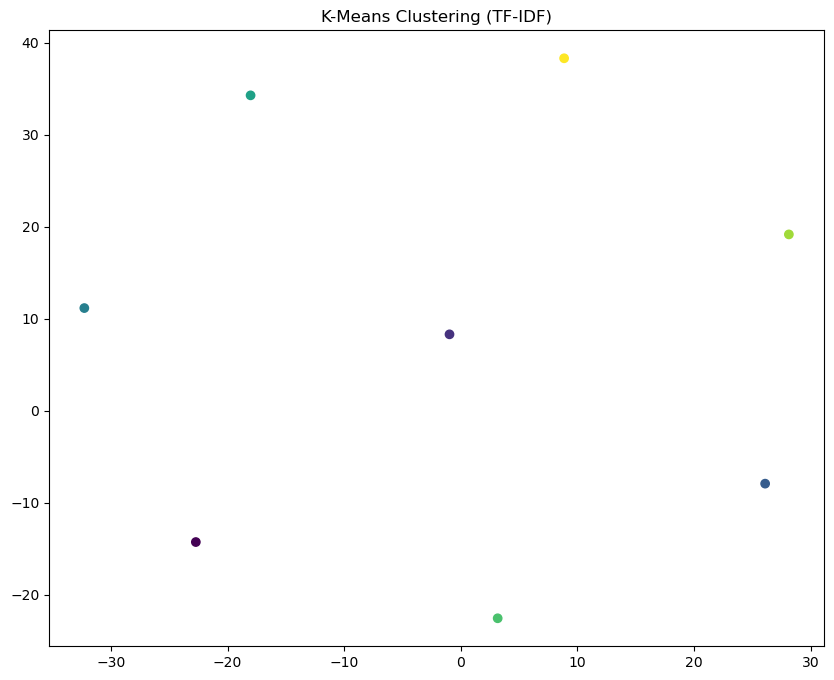

In [61]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Функція для відображення результатів кластеризації
def plot_clusters(data, labels, title):
    tsne = TSNE(n_components=2, random_state=42, perplexity=7)
    data_tsne = tsne.fit_transform(data)
    plt.figure(figsize=(10, 8))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Виберемо кількість кластерів (можете змінити за потребою)
num_clusters = 8

# Застосуємо K-Means для зваженої матриці термінів (TF-IDF)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters_tfidf = kmeans.fit_predict(df_tfidf)

# Побудуємо результати кластеризації для зваженої матриці термінів (TF-IDF)
plot_clusters(df_tfidf, clusters_tfidf, 'K-Means Clustering (TF-IDF)')

C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


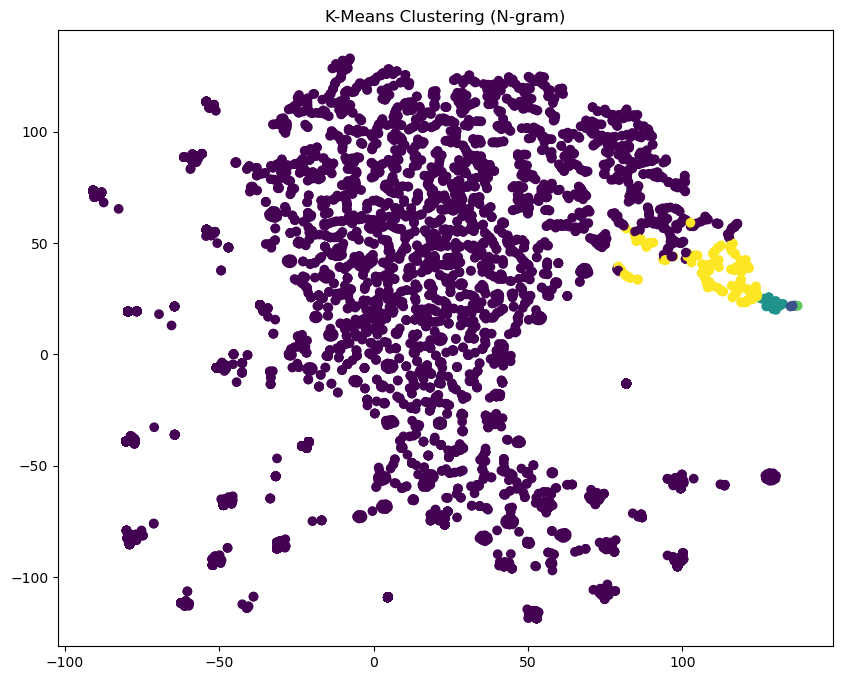

In [60]:
# Застосуємо K-Means для суміші n-грам
kmeans_ngram = KMeans(n_clusters=num_clusters, random_state=42)
clusters_ngram = kmeans_ngram.fit_predict(df_dtm)

# Побудуємо результати кластеризації для суміші n-грам
plot_clusters(df_dtm, clusters_ngram, 'K-Means Clustering (N-gram)')

<h1>Лаба 16 - Класифікація тексту</h1>

<h3>Побудова класифікатора тексту</h3>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Розділіть дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized'], df['reviews.doRecommend'], test_size=0.2, random_state=42)

# Використовуйте TfidfVectorizer для векторизації тексту
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Виберіть модель (SVM в даному випадку)
svm_model = SVC(kernel='linear', random_state=42)

# Тренування моделі
svm_model.fit(X_train_tfidf, y_train)

# Прогнози
predictions = svm_model.predict(X_test_tfidf)

# Оцінка моделі
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Classification Report
print(classification_report(y_test, predictions))

Accuracy: 0.958764863828155
              precision    recall  f1-score   support

           0       0.69      0.08      0.14       225
           1       0.96      1.00      0.98      4989

    accuracy                           0.96      5214
   macro avg       0.83      0.54      0.56      5214
weighted avg       0.95      0.96      0.94      5214



<h3>Підбір оптимальних параметрів</h3>

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Розділіть дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized'], df['reviews.doRecommend'], test_size=0.2, random_state=42)

# Визначте простір параметрів для SVM та TfidfVectorizer
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Використовуйте TfidfVectorizer для векторизації тексту
tfidf_vectorizer = TfidfVectorizer()

# Визначте класифікатор SVM
svm_model = SVC()

# Визначте об'єкт GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Побудуйте модель та здійсніть пошук по сітці
grid_search.fit(tfidf_vectorizer.fit_transform(X_train), y_train)

# Виведіть найкращі параметри
print("Best Parameters:", grid_search.best_params_)

# Оцінка на тестовому наборі
best_model = grid_search.best_estimator_
predictions = best_model.predict(tfidf_vectorizer.transform(X_test))
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on Test Set: {accuracy}')


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy on Test Set: 0.9597238204833142


<h1>Лаба 17 - Sentiment analysis та topic modeling</h1>

<h3>Перевірка polarity</h3>

In [67]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [68]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Excellent tablet I have used , I will recommend to my friends.
Review 2:
 My son wanted a tablet just for his books. We looked at e-readers and tablets, this was so much better and the price was perfect.
Review 3:
 Echo and Alexa are so ez and do so much....more than I can use but much I have to learn. AWESOME. THANKS


<h3>Перевірка subjectivity</h3>

In [69]:
# Оцінка subjectivity
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [70]:
# Виведення 3 текстів з найвищою subjectivity
print("3 Random Reviews with Highest Subjectivity:")
for index, review in enumerate(df.iloc[df['subjectivity'].sort_values(ascending=False)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index + 1), review)

3 Random Reviews with Highest Subjectivity:
Review 1:
 Nice for kids. Has parental control for apps and other functions.
Review 2:
 Can't beat the price, awesome for kids and does not break the bank.
Review 3:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it


In [75]:
df.head()

name  \
0  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                                        reviews.text  reviews.doRecommend  \
0  This product so far has not disappointed. My c...                    1   
1  great for beginner or experienced person. Boug...                    1   
2  Inexpensive tablet for him to use and learn on...                    1   
3  I have had my Fire HD 8 two weeks now and I lo...                    1   
4  I bought this for my grand daughter when she c...                    1   

   reviews.numHelpful                                            cleaned  \
0                   0  this product so far has not disappointed my ch...   
1                   0  great for beginner or experienced person bough...   
2                   0  inexpensive tablet for him to use and learn on...   
3                   0  i have had my fire hd two weeks now and i love...   
4                   0  i bought this for my grand daughter when she c...   

                                          lemmatized  polarity  subjectivity  
0  product far disappoint child love use like abi...  0.300000      0.800000  
1    great beginner experienced person buy gift love  0.700000      0.750000  
2  inexpensive tablet use learn step nabi thrille...  0.600000      0.700000  
3  fire hd week love tablet great valuewe prime m...  0.432222      0.753333  
4  buy grand daughter come visit set user enter a...  0.258929      0.567290

<h3>Візуалізація polarities відгуків користувачів для кожного продукту</h3>

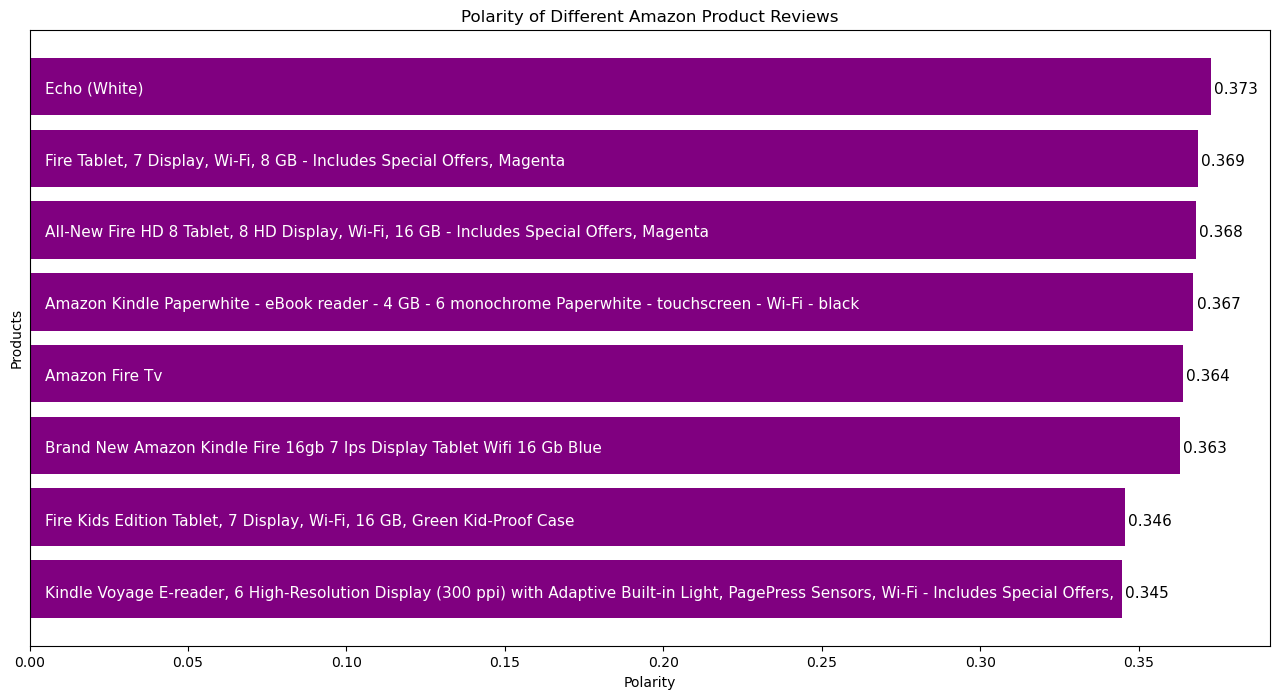

In [76]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

<h3>Візуалізація subjectivity</h3>

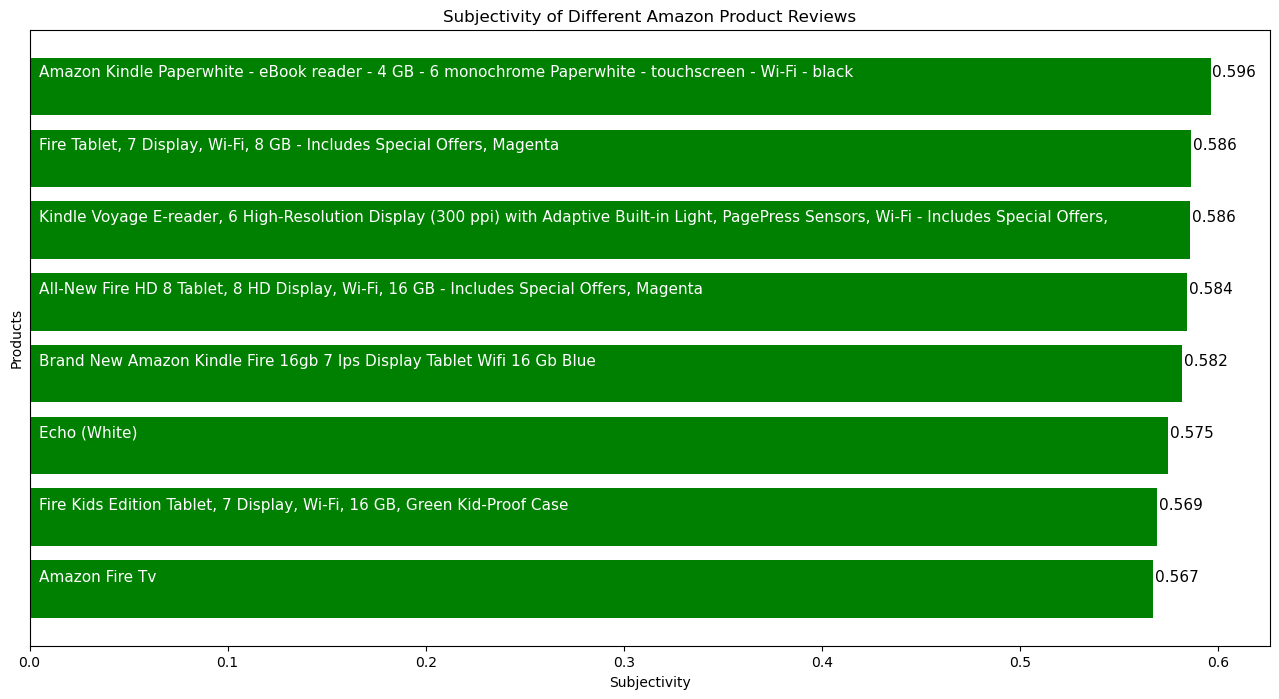

In [81]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['subjectivity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Subjectivity')
plt.ylabel('Products')
plt.title('Subjectivity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['subjectivity'],color='green',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['subjectivity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

<h3>Визначити іменники в досліджуваному тексті для конкретизації його тематики</h3>

In [82]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

# Створіть нову колонку іменників
data = df
data['nouns'] = df['lemmatized'].apply(extract_nouns)

In [83]:
data

name  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
...                                                  ...   
26063                                     Amazon Fire Tv   
26064                                     Amazon Fire Tv   
26065                                     Amazon Fire Tv   
26066                                     Amazon Fire Tv   
26067                                     Amazon Fire Tv   

                                            reviews.text  reviews.doRecommend  \
0      This product so far has not disappointed. My c...                    1   
1      great for beginner or experienced person. Boug...                    1   
2      Inexpensive tablet for him to use and learn on...                    1   
3      I have had my Fire HD 8 two weeks now and I lo...                    1   
4      I bought this for my grand daughter when she c...                    1   
...                                                  ...                  ...   
26063  It has many uses. You can listen to music, che...                    1   
26064  Cost is not outrageous. Easy setup, fun to use...                    1   
26065  I knew about this from its crowd funding start...                    1   
26066  This is a neat product but did not fit my need...                    0   
26067  Responses well and there are lots of skills to...                    1   

       reviews.numHelpful                                            cleaned  \
0                       0  this product so far has not disappointed my ch...   
1                       0  great for beginner or experienced person bough...   
2                       0  inexpensive tablet for him to use and learn on...   
3                       0  i have had my fire hd two weeks now and i love...   
4                       0  i bought this for my grand daughter when she c...   
...                   ...                                                ...   
26063                   0  it has many uses you can listen to music check...   
26064                   0  cost is not outrageous easy setup fun to use a...   
26065                   1  i knew about this from its crowd funding start...   
26066                   0  this is a neat product but did not fit my need...   
26067                   0  responses well and there are lots of skills to...   

                                              lemmatized  polarity  \
0      product far disappoint child love use like abi...  0.300000   
1        great beginner experienced person buy gift love  0.700000   
2      inexpensive tablet use learn step nabi thrille...  0.600000   
3      fire hd week love tablet great valuewe prime m...  0.432222   
4      buy grand daughter come visit set user enter a...  0.258929   
...                                                  ...       ...   
26063  use listen music check weather listen podcast ...  0.000000   
26064  cost outrageous easy setup fun use sync iphone... -0.088889   
26065  know crowd funding start wish jump board excel...  0.512500   
26066  neat product fit needsi bluetooth device recog...  0.533333   
26067           response lot skill add increase function  0.000000   

       subjectivity                                              nouns  
0          0.800000  [product, child, love, use, ability, monitor, ...  
1          0.750000                     [beginner, person, gift, love]  
2          0.700000                   [tablet, use, step, nabi, skype]  
3          0.753333  [fire, week, tablet, love, content, movie, dow...  
4          0.567290  [daughter, visit, user, age, access, site, con...  
...             ...                                                ...  
26063      0.000000              [music, chec

<h3>Моделювання тематики тексту та підбір оптимальних параметрів</h3>

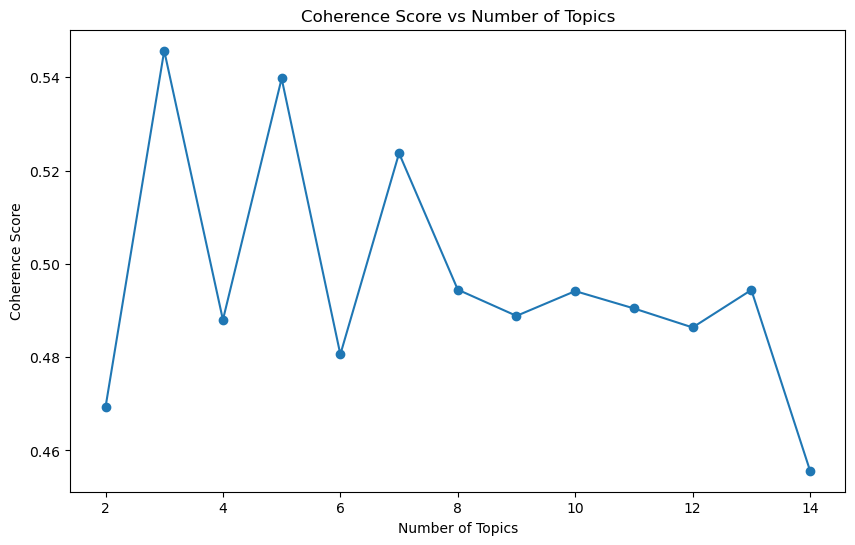

In [89]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create a Gensim dictionary
gensim_dict = Dictionary(df['lemmatized'].apply(lambda x: x.split()))

# Create a corpus
corpus = [gensim_dict.doc2bow(lemmatized.split()) for lemmatized in df['lemmatized']]

# Підбір оптимальної кількості тем
coherence_scores = []
for num_topics in range(2, 15):
    lda_model = LdaModel(corpus, id2word=gensim_dict, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemmatized'].apply(lambda x: x.split()), dictionary=gensim_dict, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

# Візуалізація кривої
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.show()


<h3>Візуалізація отримані результати щодо тематики тексту</h3>

In [99]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

# Оптимальна кількість тем (визначте це на основі аналізу графіку coherence score)
optimal_num_topics =  3 # Встановіть оптимальну кількість тем

# Побудова моделі LDA з оптимальною кількістю тем
lda_model = LdaModel(corpus, id2word=gensim_dict, num_topics=optimal_num_topics)

In [101]:
for topic_id, topic_words in lda_model.show_topics():
    print(f"Topic #{topic_id + 1}: {topic_words}")

Topic #1: 0.028*"good" + 0.025*"great" + 0.020*"alexa" + 0.018*"product" + 0.017*"amazon" + 0.016*"speaker" + 0.013*"sound" + 0.013*"like" + 0.011*"well" + 0.010*"work"
Topic #2: 0.048*"echo" + 0.043*"love" + 0.026*"great" + 0.023*"buy" + 0.018*"work" + 0.017*"use" + 0.015*"question" + 0.014*"ask" + 0.013*"home" + 0.012*"play"
Topic #3: 0.035*"use" + 0.035*"music" + 0.034*"easy" + 0.025*"light" + 0.021*"read" + 0.020*"love" + 0.017*"alexa" + 0.016*"play" + 0.015*"weather" + 0.012*"book"


<p>Тема 1:

Слова, що найбільше характеризують цю тему: "good", "great", "alexa", "product", "amazon", "speaker", "sound", "like", "well", "work".
Ймовірно, ця тема пов'язана з оглядами та враженнями від використання продуктів, таких як "alexa", "amazon", "speaker".

Тема 2:

Слова, що найбільше характеризують цю тему: "echo", "love", "great", "buy", "work", "use", "question", "ask", "home", "play".
Ймовірно, ця тема пов'язана з досвідом використання пристроїв типу "echo", можливо, з функціями контролю за домом та розвагами.

Тема 3:

Слова, що найбільше характеризують цю тему: "use", "music", "easy", "light", "read", "love", "alexa", "play", "weather", "book".
Ймовірно, ця тема стосується використання "alexa" для різних функцій, таких як програвання музики, читання книг, контроль освітлення тощо.</p>

C:\Users\amigo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 567x546031 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

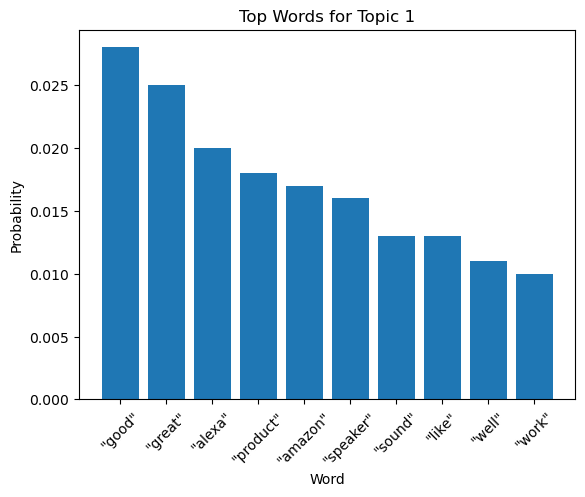

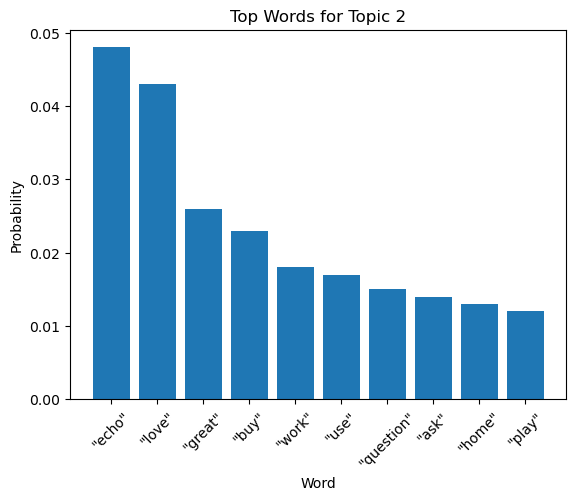

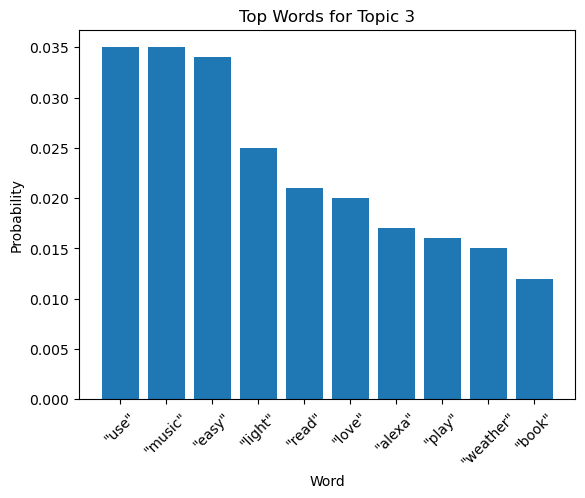

In [102]:
import matplotlib.pyplot as plt

# Розподіл тем у документах
doc_topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Побудова графіка розподілу тем
for i in range(len(doc_topics)):
    topics = [topic[1] for topic in doc_topics[i]]
    plt.plot(topics, label=f'Document {i + 1}')

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Distribution of Topics in Documents')
plt.legend()
plt.show()

# Топ-слова для кожної теми
for topic_id, topic_words in lda_model.show_topics():
    words = [word.split('*')[1].strip() for word in topic_words.split(' + ')]
    plt.bar(range(len(words)), [float(word.split('*')[0]) for word in topic_words.split(' + ')])
    plt.xlabel('Word')
    plt.ylabel('Probability')
    plt.title(f'Top Words for Topic {topic_id + 1}')
    plt.xticks(range(len(words)), words, rotation=45)
    plt.show()